# Data wrangling WeRateDogs

# Gathering data¶

In [72]:
import requests
import pandas as pd
import numpy as np
import json
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
pd.set_option('max_colwidth', 300)

In [73]:
#grab TSV for predictions from url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [74]:
# input data
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [75]:
import tweepy
import time
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [76]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [86]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 834209720923721728
Fail
323: 8341

Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 798585098161549313
Fail
606: 798576900688019456
Fail
607: 7983

Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 759923798737051648
Fail
889: 759846353224826880
Fail
890: 759793422261743616
Fail
891: 7595

Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166: 722974582966214656
Fail
1167: 722613351520608256
Fail
1168:

Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440: 696894894812565505
Fail
1441: 696886256886657024
Fail
1442: 696877980375769088
Fail
1443:

Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714: 680473011644985345
Fail
1715: 680440374763077632
Fail
1716: 680221482581123072
Fail
1717: 680206703334408192
Fail
1718:

Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989: 672834301050937345
Fail
1990: 672828477930868736
Fail
1991: 672640509974827008
Fail
1992:

Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261: 667550882905632768
Fail
2262: 667549055577362432
Fail
2263: 667546741521195010
Fail
2264: 667544320556335104
Fail
2265: 667538891197542400
Fail
2266: 667534815156183040
Fail
2267:

In [88]:
# input data json

df_list = []
with open('tweet_json.txt') as file:
    for line in file:
        line_json = json.loads(line)
        df_list.append({'tweet_id': line_json['id'],
                        'retweet_count': int(line_json['retweet_count']),
                        'favorite_count': int(line_json['favorite_count'])})
tweet_supply = pd.DataFrame(df_list,columns=['tweet_id', 'retweet_count', 'favorite_count'])
df.head()

,tweet_id,favorite_count,retweet_count,retweeted


# Assessing data

The following cells describe the columns of each table in the WeRateDogs data set. To observe the table and the corresponding description, display the entire table by displaying the collected pandas DataFrame. This task is part of the mechanical part of pandas visual evaluation.

In [89]:
# Display the twitter_archive table
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [90]:
# Display the tweet_supply table
tweet_supply

,tweet_id,retweet_count,favorite_count


In [91]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [92]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.3560000000e+03,7.8000000000e+01,7.8000000000e+01,1.8100000000e+02,1.8100000000e+02,2356.0000000000,2356.0000000000
mean,7.4277159032e+17,7.4550791786e+17,2.0141706361e+16,7.7203996104e+17,1.2416983653e+16,13.1264855688,10.4554329372
std,6.8567047445e+16,7.5824920044e+16,1.2527966626e+17,6.2369278105e+16,9.5992535332e+16,45.8766476233,6.7452372269
min,6.6602088802e+17,6.6581469670e+17,1.1856342000e+07,6.6610413329e+17,7.8321400000e+05,0.0000000000,0.0000000000
25%,6.7839893821e+17,6.7574191199e+17,3.0863744875e+08,7.1863149768e+17,4.1969838350e+09,10.0000000000,10.0000000000
50%,7.1962793472e+17,7.0387084023e+17,4.1969838350e+09,7.8046570930e+17,4.1969838350e+09,11.0000000000,10.0000000000
75%,7.9933730495e+17,8.2578037129e+17,4.1969838350e+09,8.2031463378e+17,4.1969838350e+09,12.0000000000,10.0000000000
max,8.9242064356e+17,8.8626635708e+17,8.4054786435e+17,8.8747395710e+17,7.8746177844e+17,1776.0000000000,170.0000000000


In [93]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1894,674743008475090944,NaN,NaN,2015-12-10 00:10:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She just saw a spider. 10/10 don't just stand there Sophie https://t.co/VagYftZccT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674743008475090944/photo/1,10,10,Sophie,None,None,None,None
966,750383411068534784,NaN,NaN,2016-07-05 17:38:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoe. She was trying to stealthily take a picture of you but you just noticed. 9/10 not so sneaky pupper https://t.co/FfH3o88Vta,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750383411068534784/photo/1,9,10,Zoe,None,None,pupper,None
1454,695446424020918272,NaN,NaN,2016-02-05 03:18:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We normally don't rate unicorns but this one has 3 ears so it must be super rare. 12/10 majestic af https://t.co/f9qlKiv39T,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695446424020918272/photo/1,12,10,None,None,None,None,None
999,748220828303695873,NaN,NaN,2016-06-29 18:25:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Stop what you're doing and watch this heckin masterpiece right here. Both 13/10 https://t.co/3BOVI2WZoH,NaN,NaN,NaN,https://vine.co/v/iiLjKuYJpr6,13,10,None,None,None,None,None
1446,696490539101908992,6.9648871090e+17,4196983835.0,2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193221509120/photo/1,9,10,None,None,None,None,None
217,850380195714523136,NaN,NaN,2017-04-07 16:10:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Leo. He's a personal triathlon coach. Currently overseeing this athlete's push-pups. H*ckin brutal. 13/10 would do all he asks of me https://t.co/FXZQtBcnTO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/850380195714523136/video/1,13,10,Leo,None,None,None,None
991,748699167502000129,NaN,NaN,2016-07-01 02:06:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Tripp. He's being eaten by a sherk and doesn't even care. Unfazed af. 11/10 keep doin you Tripp https://t.co/gGxjthmG1c,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/748699167502000129/photo/1,https://twitter.com/dog_rates/status/748699167502000129/photo/1",11,10,Tripp,None,None,None,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Cooper. His expression is the same wet or dry. Absolute 12/10 but Coop desperately requests your help\n\nhttps://t.co/ZMTE4Mr69f https://t.co/7RyeXTYLNi,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitter.com/dog_rates/status/868552278524837888/photo/1,https://twitter.com/dog_rates/status/868552278524837888/photo/1",12,10,Cooper,None,None,None,None
1598,686035780142297088,6.8603402480e+17,4196983835.0,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust t

In [94]:
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [95]:
twitter_archive.timestamp.sort_values(ascending=False)

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
19      2017-07-21 01:02:36 +0000
20      2017-07-20 16:49:33 +0000
21      2017-07-19 16:06:48 +0000
22      2017-07-19 03:39:09 +0000
23      2017-07-19 00:47:34 +0000
24      2017-07-18 16:08:03 +0000
25      2017-07-18 00:07:08 +0000
26      2017-07-17 16:17:36 +0000
27      2017-07-16 23:58:41 +0000
28      2017-07-16 20:14:00 +0000
29      2017-0

In [96]:
# while name are using capital 'None' define N/A
no_name_mask = (twitter_archive.name.str.islower())|(twitter_archive.name =='None')
# use~no_name_mask to fliter the incorrect name as text
twitter_archive.loc[no_name_mask,["name", "text"]].sample(10)

,name,text
1901,None,Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 https://t.co/YPfw7oahbD
735,None,"We normally don't rate lobsters, but this one appears to be a really good lobster. 10/10 would pet with caution https://t.co/YkHc7U7uUy"
1008,None,Again w the sharks guys. This week is about dogs ACTING or DRESSING like sharks. NOT actual sharks. Thank u ...11/10 https://t.co/Ie2mWXWjpr
2258,None,What a dog to start the day with. Very calm. Likes to chill by pond. Corkscrews sticking out of head. Obedient. 7/10 https://t.co/0nIxPTDWAZ
2056,None,Tfw she says hello from the other side. 9/10 https://t.co/lS1TIDagIb
2218,a,This is a Birmingham Quagmire named Chuk. Loves to relax and watch the game while sippin on that iced mocha. 10/10 https://t.co/HvNg9JWxFt
1947,None,Large blue dog here. Cool shades. Flipping us off w both hands. Obviously a preteen. 3/10 for rude blue preteen pup https://t.co/mcPd5AFfhA
624,None,Elder doggo does a splash. Both 13/10 incredible stuff https://t.co/gBUDjdEcqz
131,None,"Oh my this spooked me up. We only rate dogs, not happy ghosts. Please send dogs only. It's a very simple premise. Thank you... 13/10 https://t.co/M5Rz0R8SIQ"
551,None,HE'S TRYING TO BE HIS OWN PERSON LET HIM GO 13/10\nhttps://t.co/LEZ8jR5txd


In [97]:
# check data 1
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [98]:
twitter_archive.loc[twitter_archive.rating_numerator > 20,["rating_numerator", "text"]]

,rating_numerator,text
188,420,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
189,666,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10"
290,182,@markhoppus 182/10
313,960,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"
340,75,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…"
433,84,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516,24,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
695,75,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"
763,27,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
902,165,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE


In [99]:
twitter_archive.loc[twitter_archive.rating_denominator != 10,["rating_denominator", "text"]]

,rating_denominator,text
313,0,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"
342,15,@docmisterio account started on 11/15/15
433,70,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516,7,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784,11,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…"
902,150,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068,11,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
1120,170,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165,20,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202,50,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq


In [100]:
# duplicate fix
twitter_archive.loc[[784, 1068]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.4037318919e+17,4196983835.0,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None


In [101]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [102]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Tucker         10
Lola           10
Penny          10
Bo              9
Winston         9
Sadie           8
the             8
an              7
Buddy           7
Daisy           7
Toby            7
Bailey          7
Rusty           6
Jax             6
Jack            6
Milo            6
Leo             6
Koda            6
Scout           6
Dave            6
Stanley         6
Bella           6
Oscar           6
Louis           5
             ... 
Mutt            1
Gordon          1
incredibly      1
Lenox           1
Donny           1
Kawhi           1
Spencer         1
Emanuel         1
Hanz            1
BeBe            1
Lipton          1
Nigel           1
Sid             1
Ace             1
Jay             1
Tommy           1
Noosh           1
Chesterson      1
Aiden           1
Apollo          1
Moofasa         1
Lambeau         1
Mona            1
Milky           1
Sprinkles 

In [103]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [104]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [105]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [106]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [107]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [108]:
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [109]:
pd.set_option('precision', 10)
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.0750000000e+03,2075.0000000000,2075.0000000000,2075.0000000000,2075.0000000000
mean,7.3845135785e+17,1.2038554217,0.5945482636,0.1345886095,0.0603241686
std,6.7852033330e+16,0.5618750280,0.2711735169,0.1006657394,0.0509059313
min,6.6602088802e+17,1.0000000000,0.0443334000,0.0000000101,0.0000000002
25%,6.7648350714e+17,1.0000000000,0.3644120000,0.0538862500,0.0162224000
50%,7.1199880986e+17,1.0000000000,0.5882300000,0.1181810000,0.0494438000
75%,7.9320344853e+17,1.0000000000,0.8438550000,0.1955655000,0.0918075500
max,8.9242064356e+17,4.0000000000,1.0000000000,0.4880140000,0.2734190000


In [110]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1358,760656994973933572,https://pbs.twimg.com/media/Co5lf-KW8AAIwJw.jpg,1,golden_retriever,0.760546,True,Labrador_retriever,0.2320790,True,redbone,0.00287417,True
1074,717009362452090881,https://pbs.twimg.com/media/CfNUNetW8AAekHx.jpg,1,Siberian_husky,0.506154,True,Eskimo_dog,0.2696560,True,malamute,0.06065850,True
1290,751456908746354688,https://pbs.twimg.com/ext_tw_video_thumb/751456786360725504/pu/img/hWqfIQ29A0cBv6f_.jpg,1,golden_retriever,0.714409,True,Afghan_hound,0.0661626,True,chow,0.02841260,True
1284,750506206503038976,https://pbs.twimg.com/media/CmpVaOZWIAAp3z6.jpg,1,American_black_bear,0.219166,False,lesser_panda,0.2147150,False,titi,0.09168510,False
1424,772152991789019136,https://pbs.twimg.com/media/Crc9DEoWEAE7RLH.jpg,2,golden_retriever,0.275318,True,Irish_setter,0.1009880,True,vizsla,0.07352490,True


In [111]:
# The number of dogs that are not correctly identified
len(image_predictions[~(image_predictions.p1_dog | image_predictions.p2_dog | image_predictions.p3_dog)])

324

In [112]:
# he number of dogs that are correctly identified
len(image_predictions[(image_predictions.p1_dog | image_predictions.p2_dog | image_predictions.p3_dog)])

1751

In [113]:
tweet_supply.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
tweet_id          0 non-null object
retweet_count     0 non-null object
favorite_count    0 non-null object
dtypes: object(3)
memory usage: 0.0+ bytes


In [114]:
tweet_supply.describe()

,tweet_id,retweet_count,favorite_count
count,0,0,0
unique,0,0,0


In [115]:
tweet_supply[tweet_supply.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count


In [116]:
tweet_supply.retweet_count.value_counts()

Series([], Name: retweet_count, dtype: int64)

# Quality issues

### twitter_archive table
1. Data type in 'timestamp' column is string instead of datetime, and there should be columns for year, month and day
2. retweeted_status_id tag fields have non-empty values and there are retweeted tweets.
3. Column 'name' has values 'None', 'a', 'an', 'the' and other wrong ones
4. Columns [doggo, floofer, pupper, puppo] have "None" values instead of null values
5. There are rating_denonimator values other than 10 and wrong numerator values
6. Drop columns that won't be used for the analysis

### image_predictions table
7. Names in columns p1, p2 and p3 have different capitalisations
8. Only use first (stronger) prediction and rename the columns to 'prediction', 'confidence' and 'is_dog'
9. Drop duplicated jpg_url rows
10. Drop columns that won't be used for analysis

### tweet_supply table
11. No data due to Internet block in Mainland China or my firm certicate no feedback from twitter api


# Tidiness issues

1. Merge all tables

### twitter_archive table
2. Mutliple columns for dog type variable (doggo, floofer, pupper, puppo)

### image_predictions table
3. Only use first (stronger) prediction and rename the columns to 'dog_category', 'reliability' and 'is_dog'

# Cleaning Data


In [150]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_supply_clean = tweet_supply.copy()

### twitter_archive table

1. Data type in 'timestamp' column is string instead of datetime, and there should be columns for year, month and day

In [151]:
# convert to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

# add year, month and day columns
twitter_archive_clean['year'] = twitter_archive_clean.timestamp.dt.year
twitter_archive_clean['month'] = twitter_archive_clean.timestamp.dt.month
twitter_archive_clean['day'] = twitter_archive_clean.timestamp.dt.day

# test
twitter_archive_clean.info()
twitter_archive_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
year                    

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,2017,8,1
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,2017,8,1
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,2017,7,31
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,2017,7,30
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,2017,7,29


2. retweeted_status_id tag fields have non-empty values and there are retweeted tweets.

In [152]:
# small capital as the string 'None' as the extracted error value or other situation

retweeted_mask = twitter_archive_clean[(twitter_archive_clean.retweeted_status_id.notnull())\
|(twitter_archive_clean.retweeted_status_user_id.notnull())\
|(twitter_archive_clean.retweeted_status_timestamp.notnull())].index
# cleaning
twitter_archive_clean.drop(retweeted_mask, inplace=True)

In [153]:
# testing
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
year                          

3. Column 'name' has values 'None', 'a', 'an', 'the' and other wrong ones

In [154]:
no_name_mask = (twitter_archive_clean.name.str.islower())|(twitter_archive_clean.name =='None')
twitter_archive_clean.name = twitter_archive_clean.name[~no_name_mask]

In [155]:
twitter_archive_clean.name[twitter_archive_clean.name.isin(['a', 'an', 'the'])]

Series([], Name: name, dtype: object)

In [156]:
twitter_archive_clean.name.value_counts()

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Tucker         9
Penny          9
Lola           8
Winston        8
Sadie          8
Toby           7
Daisy          7
Koda           6
Bo             6
Jax            6
Stanley        6
Bailey         6
Oscar          6
Bella          6
Louis          5
Buddy          5
Dave           5
Milo           5
Rusty          5
Leo            5
Chester        5
Bentley        5
Scout          5
Sophie         4
Gary           4
Brody          4
              ..
Lupe           1
Craig          1
Dudley         1
Jeffrie        1
Sprinkles      1
Mona           1
Odin           1
Lambeau        1
Tayzie         1
Maks           1
Biden          1
Pepper         1
Bell           1
Dale           1
Todo           1
Duchess        1
Hermione       1
Marlee         1
BeBe           1
Lipton         1
Nigel          1
Sid            1
Ace            1
Jay            1
Tommy          1
Noosh          1
Chesterson     1
Hanz          

4. Columns [doggo, floofer, pupper, puppo] have "None" values instead of null values
6. Drop columns that won't be used for the analysis  
### Tidiness issue
2. Mutliple columns for dog type variable (doggo, floofer, pupper, puppo)

In [157]:
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',\
                            'retweeted_status_user_id','retweeted_status_timestamp','doggo', 'floofer',\
                            'pupper','puppo'], axis=1, inplace=True)

In [158]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1391 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
day                   2175 non-null int64
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 203.9+ KB


5. There are rating_denonimator values other than 10 and wrong numerator values

In [159]:
# to retain consistency in the analysis, drop rows with denominator values other than 10
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_denominator == 10]

# test
twitter_archive_clean.rating_denominator.value_counts()

10    2153
Name: rating_denominator, dtype: int64

In [160]:
# convert rating_numerator column to float type
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)

# find ratings with decimal places and check their text
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0


In [161]:
# replace found values
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

#test
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  # Remove the CWD from sys.path while we load stuff.


,tweet_id,text,rating_numerator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26


### image_predictionstable

7. Names in columns p1, p2 and p3 have different capitalisations

In [162]:
# lowercase, remove leading and trailing spaces and replace spaces with underscores
image_predictions_clean.p1 = image_predictions_clean.p1.str.lower().str.strip().replace(' ', '_')
image_predictions_clean.p2 = image_predictions_clean.p2.str.lower().str.strip().replace(' ', '_')
image_predictions_clean.p3 = image_predictions_clean.p3.str.lower().str.strip().replace(' ', '_')

#test
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.1566650,True,shetland_sheepdog,0.0614285,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.0741917,True,rhodesian_ridgeback,0.0720100,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.1385840,True,bloodhound,0.1161970,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.3606870,True,miniature_pinscher,0.2227520,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.2436820,True,doberman,0.1546290,True


Tidiness issues 3&Quality issues 8 
Only use first (stronger) prediction and rename the columns to 'dog_category', 'reliability' and 'is_dog'

In [163]:
# Select the most trusted recognition results identified as dogs, and save the columns 'dog_category', 'reliability', 'is_dog'
# Since recognition credibility is high to low according to p1 to p3, priority is given to p1 identified as a dog, followed by p2 or p3,
# When none of the three results are identified as dogs, select p1 as the final result
# Condition 1, p1 is recognized as dog, select p1
# Condition 2, p1 recognized as non-dog, p2 recognized as non-dog, select p1
# Condition 3, p1 is recognized as non-dog, p2 is recognized as dog, select p2
image_predictions_clean['dog_category'] = np.where(~image_predictions_clean.p1_dog & image_predictions_clean.p2_dog,\
                                                   image_predictions_clean.p2,\
                                                   image_predictions_clean.p1)
image_predictions_clean['reliability'] = np.where(~image_predictions_clean.p1_dog & image_predictions_clean.p2_dog,\
                                                   image_predictions_clean.p2_conf,\
                                                   image_predictions_clean.p1_conf)
image_predictions_clean['is_dog'] = np.where(~image_predictions_clean.p1_dog & image_predictions_clean.p2_dog,\
                                                   image_predictions_clean.p2_dog,\
                                                   image_predictions_clean.p1_dog)

# At the end of the comparison between p1 and p2, is_dog the selection results and p3
# Condition 1, is_dog recognized as dog, select is_dog
# Condition 2, is_dog recognized as non-dog, p3 recognized as non-dog, select is_dog
# Condition 3, is_dog recognized as non-dog, p3 recognized as dog, select p3

image_predictions_clean['dog_category'] = np.where(~image_predictions_clean.is_dog & image_predictions_clean.p3_dog,\
                                                   image_predictions_clean.p3,\
                                                   image_predictions_clean.dog_category)
image_predictions_clean['reliability'] = np.where(~image_predictions_clean.is_dog & image_predictions_clean.p3_dog,\
                                                   image_predictions_clean.p3_conf,\
                                                   image_predictions_clean.reliability)
image_predictions_clean['is_dog'] = np.where(~image_predictions_clean.is_dog & image_predictions_clean.p3_dog,\
                                                   image_predictions_clean.p3_dog,\
                                                   image_predictions_clean.is_dog)

In [164]:
# testing
len(image_predictions_clean[image_predictions_clean.is_dog])

1751

In [165]:
# is_dog the number of dogs identified as p1, p2 and p3 is equal to the sum of dogs
len(image_predictions_clean[(image_predictions.p1_dog | image_predictions.p2_dog | image_predictions.p3_dog)])

1751

In [166]:
#Remove the candidate identification results of 'p1', 'p2' and 'p3'.
image_predictions_clean.drop([ 'p1','p1_conf','p1_dog', 'p2','p2_conf','p2_dog', 'p3','p3_conf','p3_dog'], axis=1, inplace=True)

In [169]:
# testing
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id        2009 non-null int64
jpg_url         2009 non-null object
img_num         2009 non-null int64
dog_category    2009 non-null object
reliability     2009 non-null float64
is_dog          2009 non-null bool
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 96.1+ KB


9. Drop duplicated jpg_url rows
10. Drop columns that won't be used for analysis

In [170]:
image_predictions_clean.drop_duplicates(subset="jpg_url", inplace=True)

image_predictions_clean.drop(['jpg_url', 'img_num',], axis=1, inplace=True)

#test
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id        2009 non-null int64
dog_category    2009 non-null object
reliability     2009 non-null float64
is_dog          2009 non-null bool
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 64.7+ KB


### Tidiness issues

1. Merge all tables

In [171]:
# Merge
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_supply_clean, how='left', on=['tweet_id'])
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean, how='inner', on=['tweet_id'])

In [172]:
# retweet_count and favorite_count define
twitter_archive_clean.retweet_count = twitter_archive_clean.retweet_count.where(twitter_archive_clean.retweet_count.notnull(), 0)
twitter_archive_clean.favorite_count = twitter_archive_clean.favorite_count.where(twitter_archive_clean.favorite_count.notnull(), 0)
# type int
twitter_archive_clean.retweet_count = twitter_archive_clean.retweet_count.astype('int')
twitter_archive_clean.favorite_count = twitter_archive_clean.favorite_count.astype('int')

In [173]:
# testing
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 16 columns):
tweet_id              1976 non-null int64
timestamp             1976 non-null datetime64[ns]
source                1976 non-null object
text                  1976 non-null object
expanded_urls         1976 non-null object
rating_numerator      1976 non-null float64
rating_denominator    1976 non-null int64
name                  1347 non-null object
year                  1976 non-null int64
month                 1976 non-null int64
day                   1976 non-null int64
retweet_count         1976 non-null int64
favorite_count        1976 non-null int64
dog_category          1976 non-null object
reliability           1976 non-null float64
is_dog                1976 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(2), int64(7), object(5)
memory usage: 248.9+ KB


In [174]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,retweet_count,favorite_count,dog_category,reliability,is_dog
1532,674664755118911488,2015-12-09 18:59:46,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rodman. He's getting destroyed by the surfs. Valiant effort though. 10/10 better than most puppers probably https://t.co/S8wCLemrNb,https://twitter.com/dog_rates/status/674664755118911488/photo/1,10.0,10,Rodman,2015,12,9,0,0,african_crocodile,0.330625,False
32,885167619883638784,2017-07-12 16:03:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,"https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1",13.0,10,NaN,2017,7,12,0,0,malamute,0.812482,True
1705,670832455012716544,2015-11-29 05:11:35,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Amy. She is Queen Starburst. 10/10 unexplainably juicy https://t.co/Hj2HtxpcSx,https://twitter.com/dog_rates/status/670832455012716544/photo/1,10.0,10,Amy,2015,11,29,0,0,malinois,0.317607,True
1591,673352124999274496,2015-12-06 04:03:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",*lets out a tiny screech and then goes into complete cardiac arrest* 12/10 https://t.co/az5PLGzVNJ,https://twitter.com/dog_rates/status/673352124999274496/photo/1,12.0,10,NaN,2015,12,6,0,0,golden_retriever,0.672808,True
901,719332531645071360,2016-04-11 01:13:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pippa. She managed to start the car but is waiting for you to buckle up before driving. Responsible af 11/10 https://t.co/htrlmC7saz,https://twitter.com/dog_rates/status/719332531645071360/photo/1,11.0,10,Pippa,2016,4,11,0,0,dandie_dinmont,0.224415,True


# Storing Data

In [175]:
twitter_archive_clean.to_csv(path_or_buf='twitter_archive_clean_master.csv', index=False)

# Insight one & visualization

## What is the most commonly used device for WeRateDogs to post tweets?

In [176]:
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1937
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Text(0,0.5,'total')

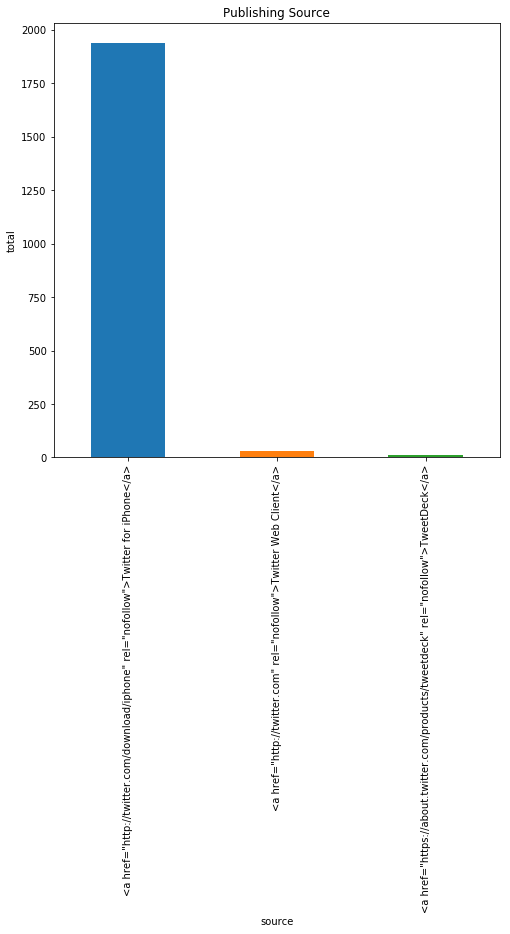

In [177]:
twitter_archive_clean.source.value_counts().plot.bar(figsize=(8,8));
plt.title('Publishing Source')
plt.xlabel('source')
plt.ylabel('total')

### The most commonly device is Iphone

# Insight two & visualization

## What type of dog is more likely to identify a dog?

In [178]:
twitter_archive_clean[twitter_archive_clean.is_dog].dog_category.value_counts().head(5)

golden_retriever      154
labrador_retriever    105
pembroke               95
chihuahua              90
pug                    62
Name: dog_category, dtype: int64

Text(0,0.5,'count')

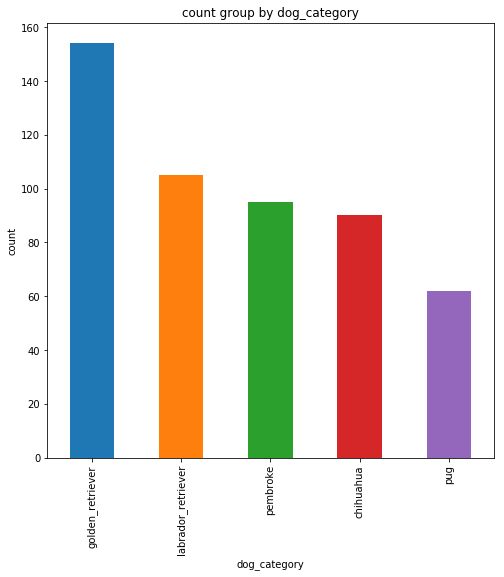

In [179]:
twitter_archive_clean[twitter_archive_clean.is_dog].dog_category.value_counts().head(5).plot.bar(figsize=(8,8));
plt.title("count group by dog_category")
plt.xlabel("dog_category")
plt.ylabel("count")

### Golden retriever is more likely to be identified.

# Insight three & visualization

## What type of dog most rated?

In [228]:
twitter_archive_clean[twitter_archive_clean.is_dog].groupby('dog_category').sum().rating_numerator.sort_values(ascending=False).head(5)

dog_category
golden_retriever      1787.5
labrador_retriever    1176.0
pembroke              1084.0
chihuahua              950.0
pug                    635.0
Name: rating_numerator, dtype: float64

Text(0,0.5,'count')

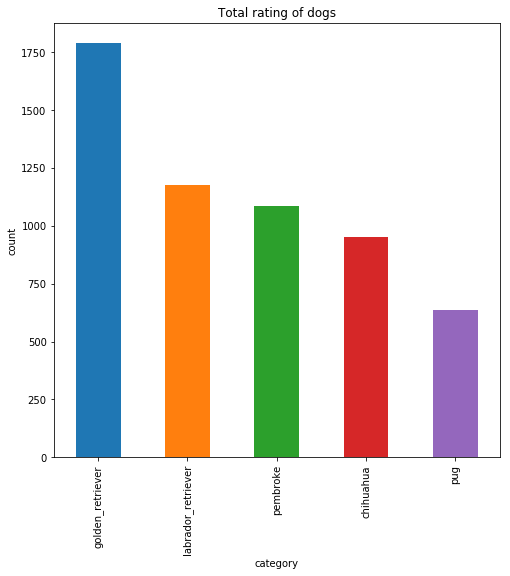

In [230]:
twitter_archive_clean[twitter_archive_clean.is_dog].groupby('dog_category').sum().rating_numerator.sort_values(ascending=False).head(5).\
plot.bar(figsize=(8,8));
plt.title('Total rating of dogs')
plt.xlabel('category')
plt.ylabel('count')

### Golden retriever is most rated dog.